In [1]:
import kagglehub
import pandas as pd

In [2]:
path = kagglehub.dataset_download("olgabelitskaya/flower-color-images")

100%|██████████| 50.1M/50.1M [00:00<00:00, 79.1MB/s]

Extracting files...


In [3]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/olgabelitskaya/flower-color-images/versions/7/flower_images/flower_images/flower_labels.csv')
df.head()

,file,label
0,0001.png,0
1,0002.png,0
2,0003.png,2
3,0004.png,0
4,0005.png,0


In [4]:
from IPython import display
from PIL import Image

<class 'PIL.PngImagePlugin.PngImageFile'>
(128, 128)


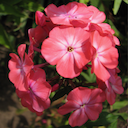

In [5]:
img_1 = Image.open("/root/.cache/kagglehub/datasets/olgabelitskaya/flower-color-images/versions/7/flower_images/flower_images/0001.png")

print(type(img_1))
print(img_1.size)
img_1

In [ ]:
# Note users would need to pip install this if they weren't working in Google Cloud Colab notebooks:
# pip install --upgrade google-genai
# gcloud auth application-default login

#And the instructions I'm following are here: https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/image-understanding

In [6]:

from google import genai
from google.genai import types
import base64

with open("/root/.cache/kagglehub/datasets/olgabelitskaya/flower-color-images/versions/7/flower_images/flower_images/0001.png", "rb") as f:
    local_file_img_bytes = f.read()

def generate():
  client = genai.Client(
      vertexai=True,
      project="cco-test-lab",
      location="us-central1",
  )

  image1 = types.Part.from_bytes(data=local_file_img_bytes, mime_type="image/png")

  text1 = types.Part.from_text(text="""Please write a description of the flower shown in the image and give information about its optimal growing conditions.""")

  model = "gemini-2.0-flash-001"
  contents = [
    types.Content(
      role="user",
      parts=[
        image1,
        text1
      ]
    )
  ]
  generate_content_config = types.GenerateContentConfig(
    temperature = 1,
    top_p = 0.95,
    max_output_tokens = 8192,
    response_modalities = ["TEXT"],
  )

  for chunk in client.models.generate_content_stream(
    model = model,
    contents = contents,
    config = generate_content_config,
    ):
    print(chunk.text, end="")

generate()

Here is a description of the flower in the image and information about its optimal growing conditions:

**Description:**

The image shows a cluster of flowers with a salmon-pink color. Each flower has five petals that are broadly rounded and slightly notched at the tips. The center of each flower is slightly lighter in color, creating a subtle contrast. The overall form is a rounded cluster, suggesting it is a *Phlox paniculata*, commonly known as garden phlox.

**Optimal Growing Conditions:**

Garden phlox are popular perennial garden flowers. Here's how to help them thrive:

*   **Light:** Garden phlox prefers full sun (6-8 hours of direct sunlight per day) for the best flowering and disease resistance. They can tolerate partial shade, but flowering may be reduced, and they may be more susceptible to powdery mildew.
*   **Soil:** Well-drained soil is essential. The soil should be rich in organic matter. Amend the soil with compost before planting.
*   **Watering:** Water deeply and r